<a href="https://colab.research.google.com/github/k3nidhi/Datascience/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

warnings.filterwarnings('ignore')

In [5]:
# Display the first few rows of the training dataset
print(train_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
# Check for missing values
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Fill missing values or drop columns as needed
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)  # Filling missing Age
train_df.drop(columns=['Cabin', 'Ticket'], inplace=True)  # Dropping columns not needed for analysis

In [8]:
# Convert categorical variables into numeric using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

**Exploratory Data Analysis (EDA)**

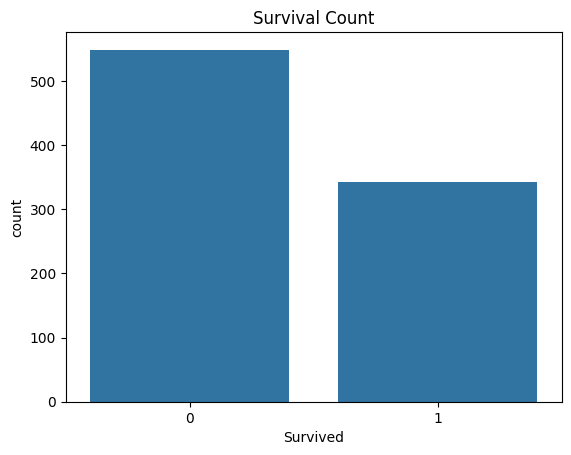

In [9]:

# Distribution of the target variable
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

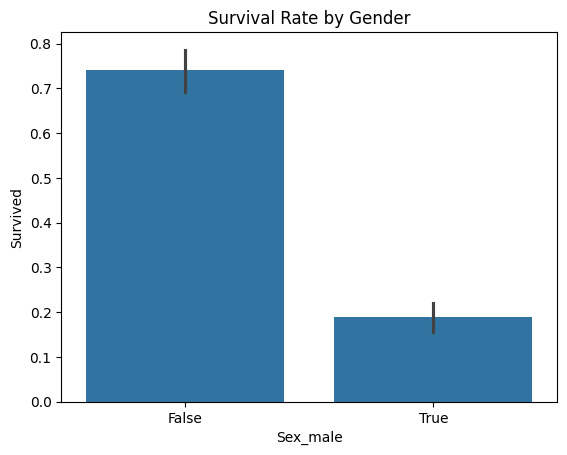

In [10]:
# Analyzing survival based on gender
sns.barplot(x='Sex_male', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()


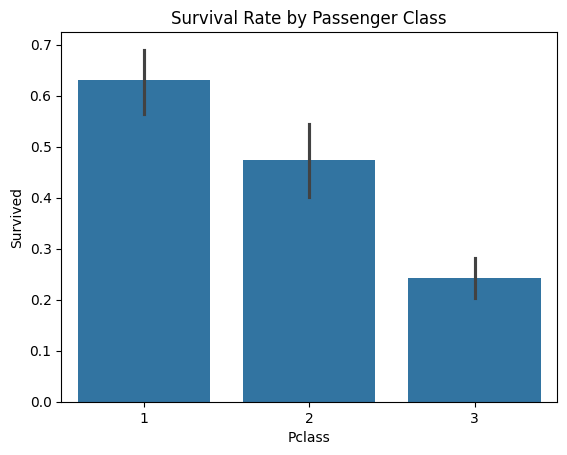

In [11]:
# Analyzing survival based on passenger class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

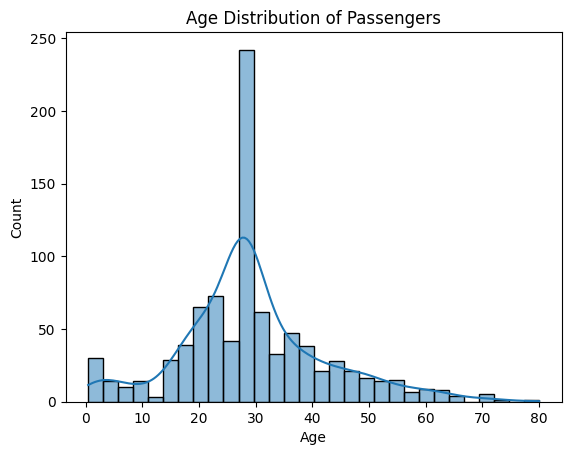

In [12]:
# Age distribution
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

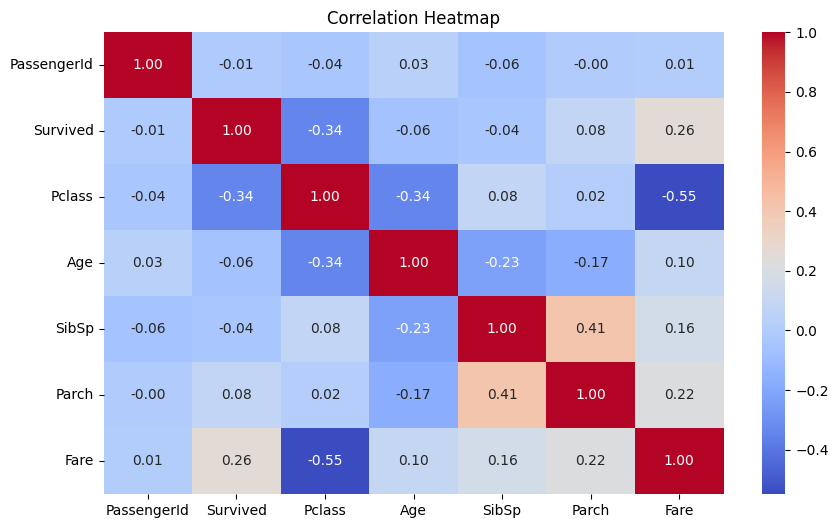

In [13]:

# Correlation heatmap
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()


# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

